# Частина 1: Знайомство з Pandas

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт **народжуваності** в регіонах України (1950—2019)" [посилання](https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96)

#####  Вивести перші рядки таблиці за допомогою методу head

In [3]:
import pandas as pd
from urllib.parse import quote

url ="https://uk.wikipedia.org/wiki/Населення_України#Народжуваність"
encoded_url = quote(url, safe=':/')
tables = pd.read_html(encoded_url)

data = tables[12]

data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


##### Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [4]:
num_rows, num_columns = data.shape
print(f"Кількість рядків: {num_rows}, Кількість стовпців: {num_columns}")

Кількість рядків: 28, Кількість стовпців: 9


##### Замініть у таблиці значення "—" на значення NaN

In [5]:
data[data.columns[1:]] = data[data.columns[1:]].apply(pd.to_numeric, errors='coerce')
data = data.applymap(lambda x: x / 10 if pd.notna(x) and isinstance(x, (int, float)) else x)

data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


##### Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [6]:
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

##### Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [7]:
data.fillna(0, inplace=True)
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,0.0,0.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,0.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


##### Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [8]:
data_with_missing = tables[12].drop(columns=['Регіон'])

missing_values = data_with_missing.isnull().sum()
missing_percentage = round((missing_values / len(data_with_missing)) * 100, 2)

print("Кількість пропущених значень за кожним стовпцем (од.):")
print(missing_values)

print("\nЧастка пропущених значень за кожним стовпцем (%):")
print(missing_percentage)

Кількість пропущених значень за кожним стовпцем (од.):
1950    2
1960    1
1970    1
1990    0
2000    0
2012    0
2014    2
2019    4
dtype: int64

Частка пропущених значень за кожним стовпцем (%):
1950     7.14
1960     3.57
1970     3.57
1990     0.00
2000     0.00
2012     0.00
2014     7.14
2019    14.29
dtype: float64



#####  Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [9]:
data_new = data.drop([27])
data_new

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,0.0,0.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,0.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0



##### Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [10]:
data_2 = tables[12].drop([27])

data_2[data_2.columns[1:]] = data_2[data_2.columns[1:]].apply(pd.to_numeric, errors='coerce')
data_2 = data_2.applymap(lambda x: x / 10 if pd.notna(x) and isinstance(x, (int, float)) else x)


for col in data_2.iloc[:, 1:].columns:
    data_2[col].fillna(data_2[col].mean(), inplace=True)

data_2.iloc[:, 1:] = data_2.iloc[:, 1:].apply(lambda x: x.round(2))
data_2

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.60,16.0,13.0,7.3,12.6,11.14,8.02
1,Вінницька,22.4,19.20,14.2,12.4,8.4,11.2,10.90,7.60
2,Волинська,24.7,25.00,17.9,15.3,11.2,14.8,14.10,10.10
3,Дніпропетровська,20.4,20.40,15.1,12.3,7.1,11.2,11.10,7.10
4,Донецька,27.1,21.40,14.0,10.9,6.1,9.8,8.20,8.02
5,Житомирська,26.1,22.30,15.9,12.9,8.9,12.2,12.00,7.90
6,Закарпатська,31.4,27.30,20.7,16.8,11.5,15.1,14.60,10.40
7,Запорізька,21.9,19.70,15.0,12.4,7.1,10.6,10.60,6.80
8,Івано-Франківська,24.3,24.80,18.2,15.5,10.3,12.4,12.20,8.80
9,Київська,20.4,18.90,15.6,12.3,7.3,12.2,12.10,8.00



##### Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [11]:
average_birth_rate_2019 = data_2['2019'].mean()

regions_above_average = data_2[data_2['2019'] > average_birth_rate_2019][['Регіон', '2019']]

print("Середній рівень народжуваності по Україні у 2019 році:", round(average_birth_rate_2019, 3))
print("\nРегіони з вищим за середній рівнем народжуваності у 2019 році:")
print(regions_above_average.to_string(index=False, header=False))


Середній рівень народжуваності по Україні у 2019 році: 8.018

Регіони з вищим за середній рівнем народжуваності у 2019 році:
             Крим  8.02
        Волинська 10.10
         Донецька  8.02
     Закарпатська 10.40
Івано-Франківська  8.80
        Луганська  8.02
        Львівська  8.70
          Одеська  8.80
       Рівненська 10.70
       Херсонська  8.10
      Чернівецька  9.20
             Київ 11.00
      Севастополь  8.02


##### У якому регіоні була найвища народжуваність у 2014 році?

In [12]:
max_birth_rate_2014 = data_2['2014'].max()

region_max_rate = data_2[data_2['2014'] == max_birth_rate_2014][['Регіон', '2014']]

print("\nРегіон з найвищою народжуваністю у 2014 році:", region_max_rate.to_string(index=False, header=False))


Регіон з найвищою народжуваністю у 2014 році: Рівненська 14.8


##### Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

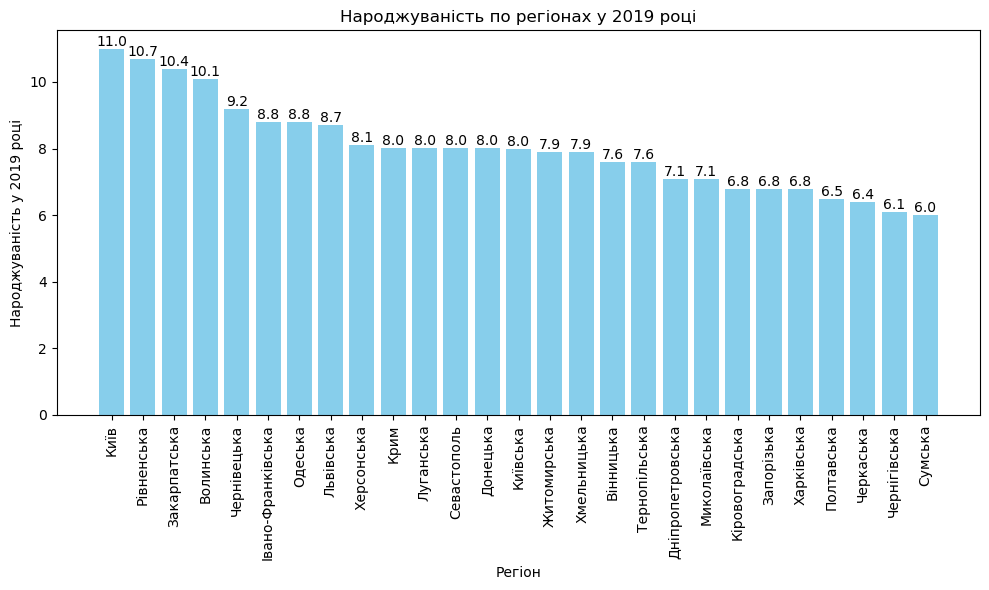

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

birth_rate_2019 = data_2[['Регіон', '2019']]

sorted_data = birth_rate_2019.sort_values(by='2019', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_data['Регіон'], sorted_data['2019'], color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2019 році')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xticks(rotation=90)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')


plt.tight_layout()
plt.show()


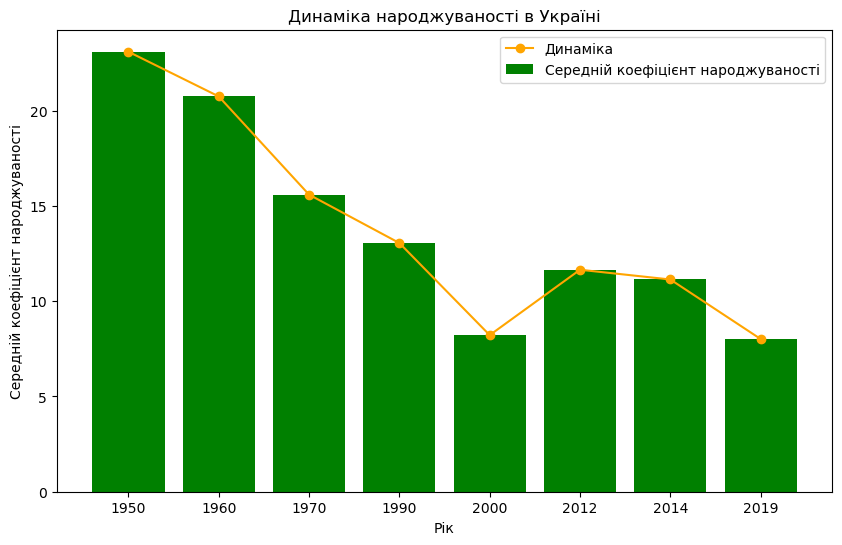

In [84]:
data_for_bar_chart = data_2.drop('Регіон', axis=1)

plt.figure(figsize=(10, 6))

bars = plt.bar(data_for_bar_chart.columns, data_for_bar_chart.mean(), color='green', label='Середній коефіцієнт народжуваності')

plt.plot(data_for_bar_chart.columns, data_for_bar_chart.mean(), marker='o', color='orange', label='Динаміка')

plt.xlabel('Рік')
plt.ylabel('Середній коефіцієнт народжуваності')
plt.title('Динаміка народжуваності в Україні')
plt.legend()

plt.show()

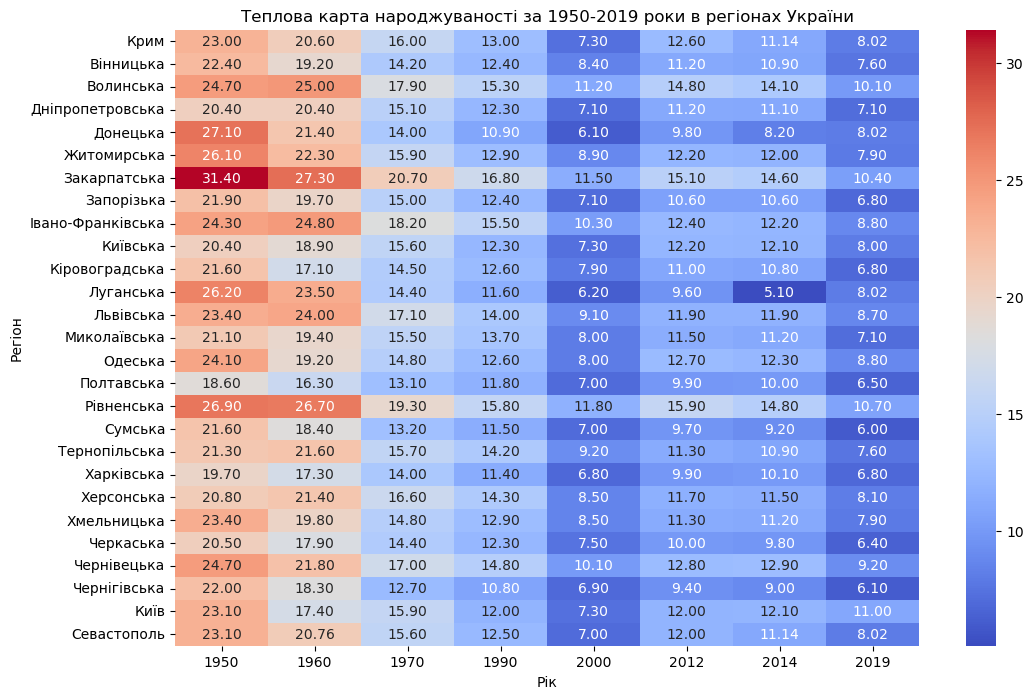

In [25]:
import seaborn as sns

data_for_heatmap = data_2.set_index('Регіон')

plt.figure(figsize=(12, 8))

sns.heatmap(data_for_heatmap, annot=True, cmap='coolwarm', fmt=".2f")

plt.xlabel('Рік')
plt.ylabel('Регіон')
plt.title('Теплова карта народжуваності за 1950-2019 роки в регіонах України')

plt.show()

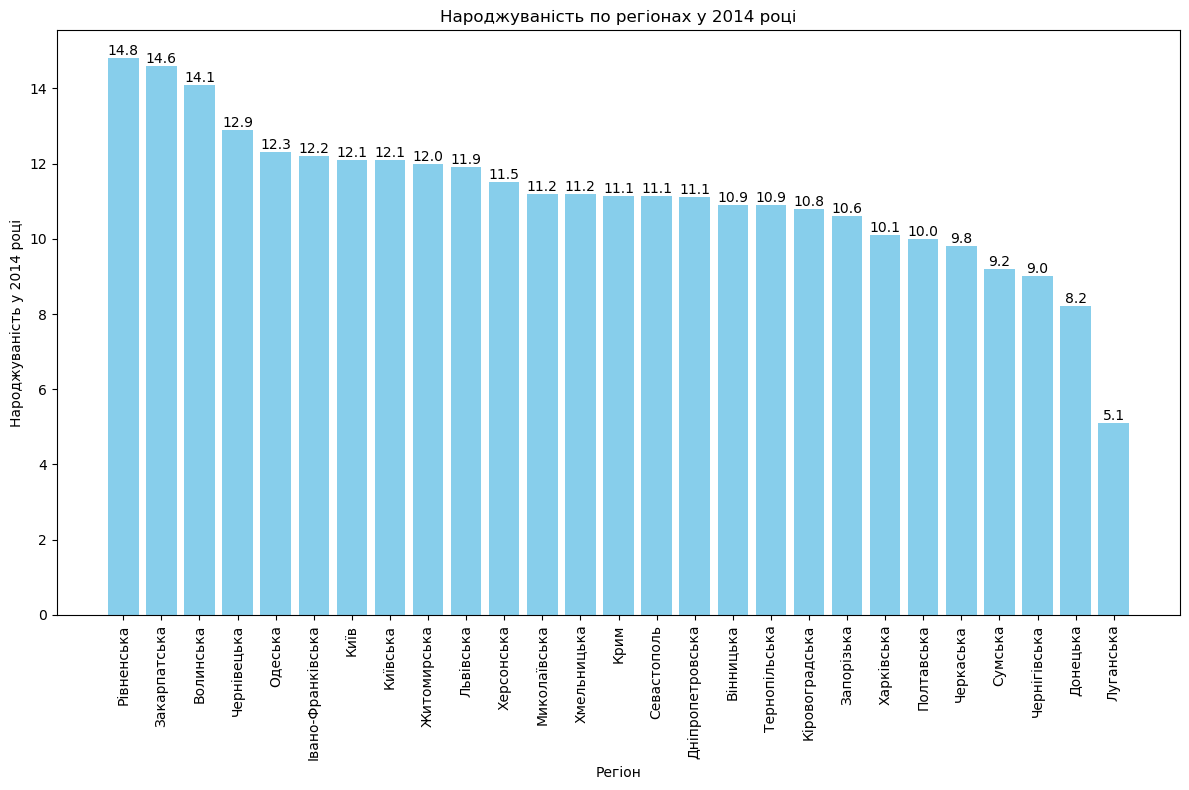

In [26]:
birth_rate_2014 = data_2[['Регіон', '2014']]

sorted_data_2014 = birth_rate_2014.sort_values(by='2014', ascending=False)

plt.figure(figsize=(12, 8))

bars = plt.bar(sorted_data_2014['Регіон'], sorted_data_2014['2014'], color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2014 році')
plt.title('Народжуваність по регіонах у 2014 році')
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

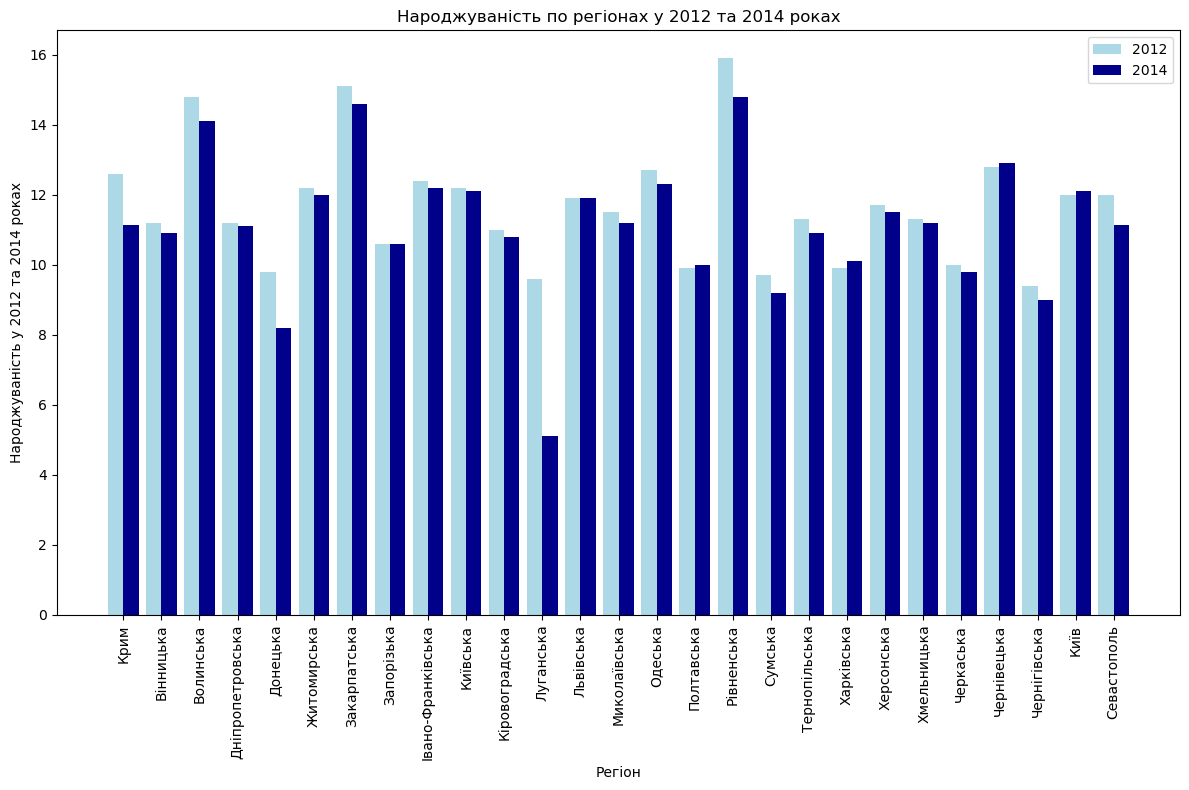

In [83]:
birth_rate_2012_2014 = data_2[['Регіон', '2012', '2014']].copy()

birth_rate_2012_2014['Падіння %'] = ((birth_rate_2012_2014['2012'] - birth_rate_2012_2014['2014']) / birth_rate_2012_2014['2012']) * 100
birth_rate_2012_2014['Падіння %'] = birth_rate_2012_2014['Падіння %'].abs()
sorted_data_2014 = birth_rate_2012_2014.sort_values(by='2014', ascending=False)

plt.figure(figsize=(12, 8))

bar_width = 0.4
bars_2012 = plt.bar(sorted_data_2014.index - bar_width / 2, sorted_data_2014['2012'], width=bar_width, color='lightblue', label='2012')
bars_2014 = plt.bar(sorted_data_2014.index + bar_width / 2, sorted_data_2014['2014'], width=bar_width, color='darkblue', label='2014')


plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2012 та 2014 роках')
plt.title('Народжуваність по регіонах у 2012 та 2014 роках')
plt.xticks(sorted_data_2014.index, sorted_data_2014['Регіон'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

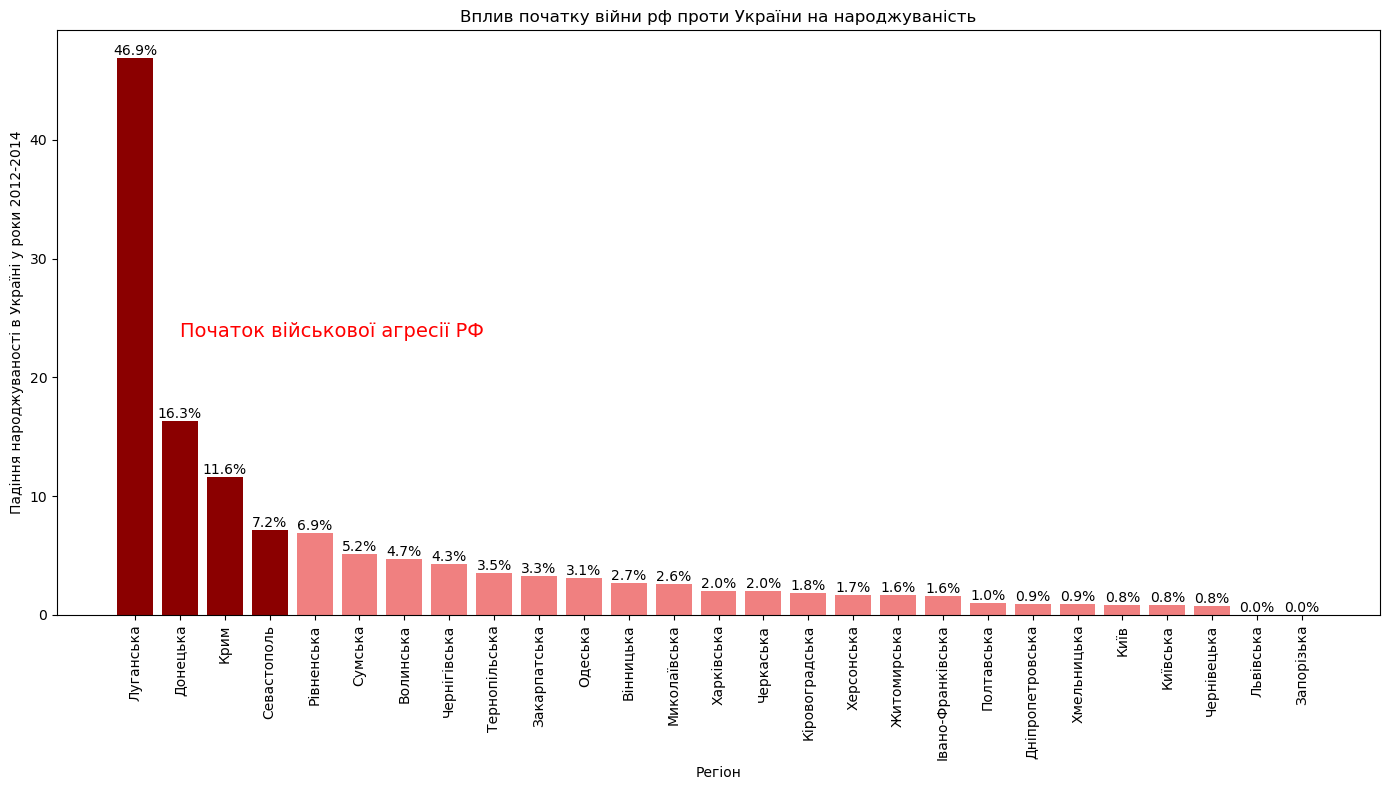

In [102]:
birth_rate_2012_2014 = data_2[['Регіон', '2012', '2014']].copy()

birth_rate_2012_2014['Падіння %'] = ((birth_rate_2012_2014['2012'] - birth_rate_2012_2014['2014']) / birth_rate_2012_2014['2012']) * 100
birth_rate_2012_2014['Падіння %'] = birth_rate_2012_2014['Падіння %'].abs()

sorted_data_2014 = birth_rate_2012_2014.sort_values(by='Падіння %', ascending=False)

plt.figure(figsize=(14, 8))


bars = plt.bar(sorted_data_2014['Регіон'], sorted_data_2014['Падіння %'], color=['darkred' if i < 4 else 'lightcoral' for i in range(len(sorted_data_2014))])
plt.text(sorted_data_2014['Регіон'].iloc[1], sorted_data_2014['Падіння %'].max() * 0.5, 'Початок військової агресії РФ', ha='left', fontsize=14, color='red')

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(sorted_data_2014.iloc[i]["Падіння %"], 1)}%', ha='center', va='bottom', color='black')

plt.xlabel('Регіон')
plt.ylabel('Падіння народжуваності в Україні у роки 2012-2014')
plt.title('Вплив початку війни рф проти України на народжуваність')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

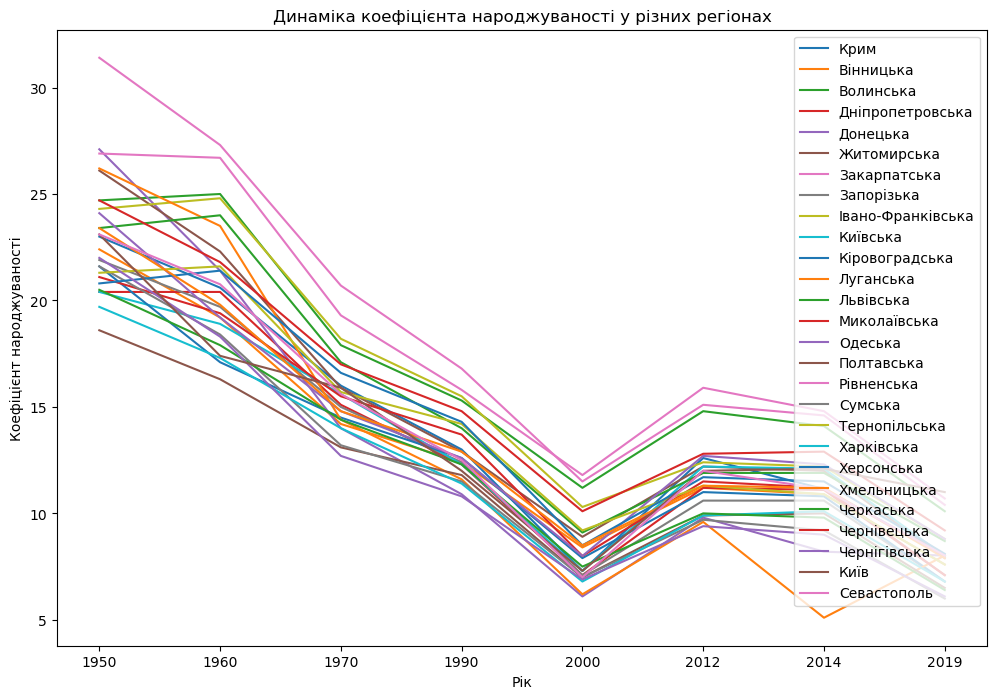

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for region in data_2['Регіон']:
    plt.plot(data_2.columns[1:], data_2[data_2['Регіон'] == region].values[0][1:], label=region)

plt.xlabel('Рік')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('взаємозв'язку між коефіцієнтом народжуваності та роком для кожного регіону.')
plt.legend()
plt.show()

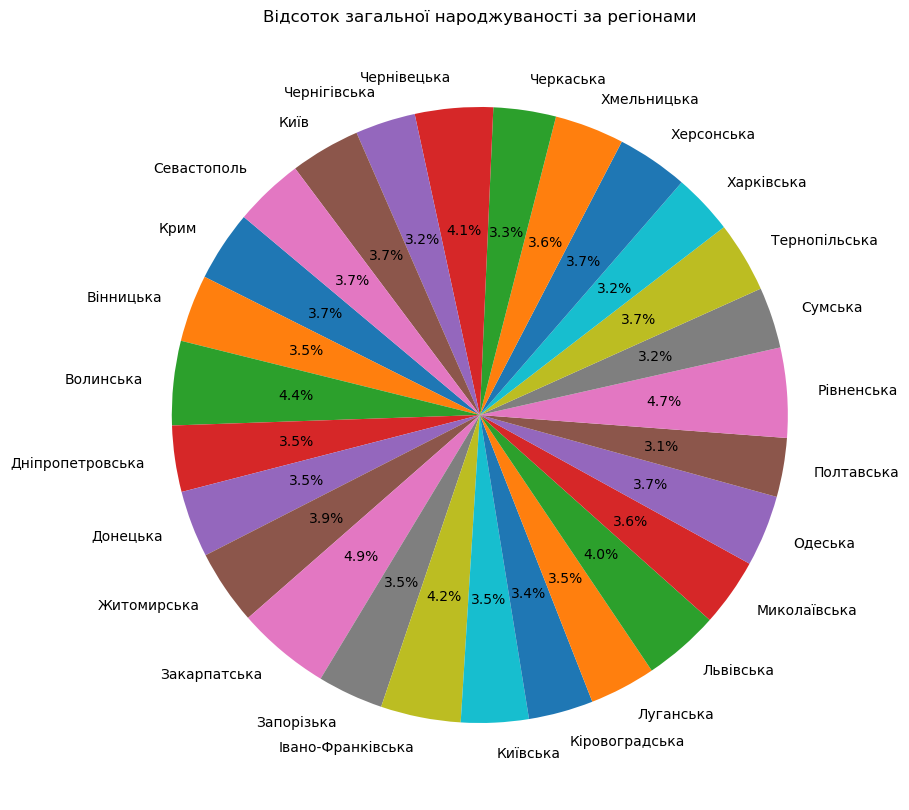

In [87]:
plt.figure(figsize=(10, 10))

total_births = data_2.iloc[:, 1:].sum(axis=1)

plt.pie(total_births, labels=data_2['Регіон'], autopct='%1.1f%%', startangle=140)

plt.title('Відсоток загальної народжуваності за регіонами')
plt.show()

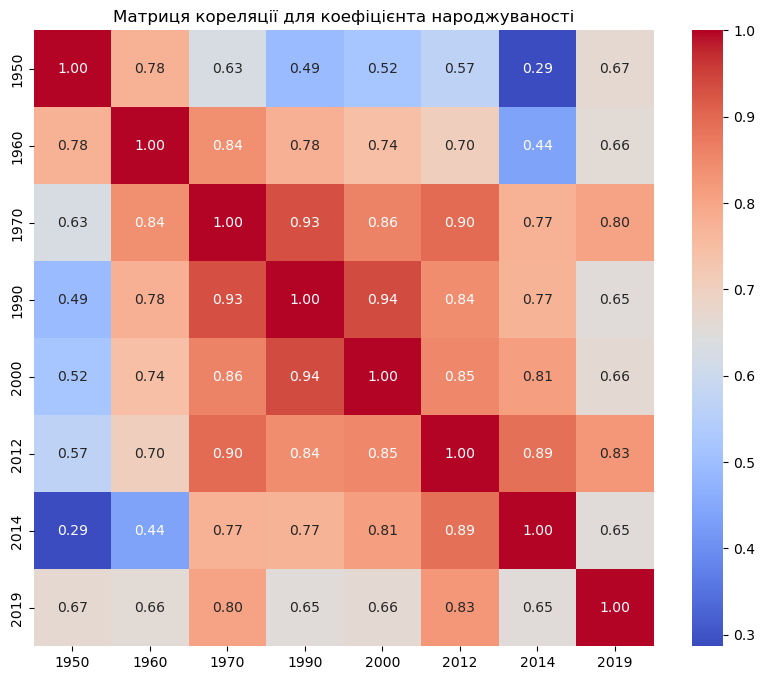

In [96]:
correlation_matrix = data_2.iloc[:, 1:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матриця кореляції для коефіцієнта народжуваності')
plt.show()